## Enrichment analysis and GO plots 

It is crucial to understand the functional significance of the list of genes identified by high-throughput genomic methods. Enrichment analysis (or pathway analysis) can identify terms which are statistically over or under-represented within the list of interest, by systematically mapping genes and proteins to their associated biological annotations (such as gene ontology GO terms or pathway membership) and then comparing the distribution of the terms within a gene set of interest with the background distribution of these terms (eg all genes represented on a microarray chip). 

In this template the enrichment is performed using WebGestalt in R and the visualization is done with GOplot package.

Zhang, B., Kirov, S.A., Snoddy, J.R. (2005). WebGestalt: an integrated system for exploring gene sets in various biological contexts. Nucleic Acids Res, 33(Web Server issue), W741-748.
Walter, Wencke, Fátima Sánchez-Cabo, and Mercedes Ricote. "GOplot: an R package for visually combining expression data with functional analysis." Bioinformatics (2015): btv300. 

In [3]:
suppressPackageStartupMessages(library(WebGestaltR))

**Results obtained in the meta analysis from expression data are explored here.**

In [5]:
# get the dataset to explore
meta.results<-read.table("/home/guess/MetaAnalysis/GeneExprMeta/meta_result_case-ctl")
head(meta.results,n=3)

,rank,logFC.case.ctl,Var,Qpvalue,REM.Pvalue,REM.FDR,Fisher.Pvalue,Fisher.FDR,n.estimators
ANKHD1-EIF4EBP3,1,0.2311820,0.14104115,5.669907e-12,0.538174920,0.77161190,0,0,2
ARHGEF9,1,-0.3601272,0.01322088,7.571364e-02,0.001736033,0.02073393,0,0,2
ATP6V1H,1,-0.4756527,0.11613876,6.065009e-05,0.162795809,0.44010271,0,0,2


In [16]:
# WebGestalt categories to be explored
categories.database=c("geneontology_Biological_Process","geneontology_Cellular_Component","geneontology_Molecular_Function","pathway_KEGG","pathway_Wikipathway","pathway_Reactome","pathway_Panther")
categories.short=c("BP","CC","MF","KEGG","Wikipathway","Reactome","Panther")
categories.toplot=c("BP","CC","MF")

In [18]:
outpath="enrich_plots_results"

In [19]:
?WebGestaltR

**Alter the parameters of WebGestaltR at your convenience**

The following code loops through all the categories and calls the WebGestaltR method to perform the analysis. The object 'result.cat' contains the result of the current category being queried and the object 'result' contains the concatenation of all categories.

In [31]:
DEGenes=rownames(meta.results[1:200 ,]) # top 200 genes
#DEGenes=rownames(meta.results[DEresult$padj<0.05 ,]) # Differentially Expressed genes, with adjusted p value > 0.05
#if (length(DEGenes) > 200) {DEGenes=DEGenes[1:200]}

# genedf.list will store genes and logFC for go plots
genedf.list=data.frame(ID=rownames(meta.results[DEGenes ,]),logFC=meta.results[DEGenes ,]$logFC.case.ctl)

result=data.frame() # dataframe that will contain all categories results from a DE analysis file
for (i in 1:length(categories.database)){ # for each category get the enrichment results
    cat("\n",categories.short[[i]],"\n")
    result.cat=WebGestaltR(enrichMethod="ORA", organism="hsapiens",enrichDatabase=categories.database[[i]],enrichDatabaseFile=NULL, 
             enrichDatabaseType=NULL,enrichDatabaseDescriptionFile=NULL,interestGeneFile=NULL, 
             interestGene=DEGenes,interestGeneType="genesymbol",collapseMethod="mean",referenceGeneFile=NULL,
             referenceGene=NULL,referenceGeneType="genesymbol",referenceSet="genome", minNum=10, maxNum=500,
             fdrMethod="BH",sigMethod="fdr",fdrThr=0.20,topThr=10,dNum=20,perNum=1000,
             lNum=20,is.output=FALSE,outputDirectory=NULL,projectName=NULL,keepGSEAFolder=FALSE,
             methodType="R",dagColor="binary",hostName="http://www.webgestalt.org/")
    cat(dim(result.cat))
    if(!is.null(dim(result.cat))){ # if there exists enrichment for this category
        result.cat=cbind(category = categories.short[[i]], result.cat) # add column with category at front
        result=rbind(result,result.cat)
    } 
}
filename="meta_case_control"
write.table(result,paste(outpath,filename,sep="/"))


 BP 
Uploading the functional categories...
Uploading the gene list...
Uploading the reference gene list...
Perform the enrichment analysis...
2 11
 CC 
Uploading the functional categories...
Uploading the gene list...
Uploading the reference gene list...
Perform the enrichment analysis...
2 11
 MF 
Uploading the functional categories...
Uploading the gene list...
Uploading the reference gene list...
Perform the enrichment analysis...
3 11
 KEGG 
Uploading the functional categories...
Uploading the gene list...
Uploading the reference gene list...
Perform the enrichment analysis...
26 11
 Wikipathway 
Uploading the functional categories...
Uploading the gene list...
Uploading the reference gene list...
Perform the enrichment analysis...
37 11
 Reactome 
Uploading the functional categories...
Uploading the gene list...
Uploading the reference gene list...
Perform the enrichment analysis...
47 11
 Panther 
Uploading the functional categories...
Uploading the gene list...
Uploading the r

In [32]:
result

,category,geneset,description,link,C,O,E,R,PValue,FDR,overlapGene,OverlapGene_UserID
2,BP,GO:0070423,nucleotide-binding oligomerization domain containing signaling pathway,http://amigo.geneontology.org/amigo/term/GO:0070423,34,5,0.3325132,15.036996,1.858643e-05,0.06334751,331;3551;4792;5970;7334,XIAP;IKBKB;NFKBIA;RELA;UBE2N
1,BP,GO:0035872,"nucleotide-binding domain, leucine rich repeat containing receptor signaling pathway",http://amigo.geneontology.org/amigo/term/GO:0035872,35,5,0.3422930,14.607367,2.151384e-05,0.06334751,331;3551;4792;5970;7334,XIAP;IKBKB;NFKBIA;RELA;UBE2N
21,CC,GO:0016469,proton-transporting two-sector ATPase complex,http://amigo.geneontology.org/amigo/term/GO:0016469,48,4,0.3170592,12.615942,2.809133e-04,0.12184346,9556;51382;51606;93974,ATP6V1D;ATP6V1H;ATPIF1;C14orf2
11,CC,GO:0005743,mitochondrial inner membrane,http://amigo.geneontology.org/amigo/term/GO:0005743,483,11,3.1904078,3.447835,3.547117e-04,0.12184346,4711;4976;9556;10131;25875;29088;55744;79590;84303;93974;117145,TRAP1;THEM4;LETMD1;MRPL15;NDUFB5;OPA1;COA1;MRPL24;CHCHD6;ATPIF1;C14orf2
22,MF,GO:0031435,mitogen-activated protein kinase kinase kinase binding,http://amigo.geneontology.org/amigo/term/GO:0031435,17,3,0.1383721,21.680672,3.297753e-04,0.19548521,6929;11329;142679,STK38;DUSP19;TCF3
3,MF,GO:0032813,tumor necrosis factor receptor superfamily binding,http://amigo.geneontology.org/amigo/term/GO:0032813,45,4,0.3662791,10.920635,4.826324e-04,0.19548521,8837;9577;9966;10131,TRAP1;CFLAR;BRE;TNFSF15
12,MF,GO:0003924,GTPase activity,http://amigo.geneontology.org/amigo/term/GO:0003924,226,8,1.8395349,4.348925,5.269143e-04,0.19548521,381;4976;7280;8934;10381;27175;54552;64121,TUBB3;TUBG2;ARF5;OPA1;GNL3L;RRAGC;TUBB2A;RAB29
27,KEGG,hsa04064,NF-kappa B signaling pathway - Homo sapiens (human),http://www.kegg.jp/kegg-bin/show_pathway?hsa04064,95,7,1.0195122,6.866029,6.452398e-05,0.01202499,331;3551;4790;4792;51588;5970;8837,XIAP;IKBKB;NFKB1;NFKBIA;PIAS4;RELA;CFLAR
17,KEGG,hsa05120,Epithelial cell signaling in Helicobacter pylori infection - Homo sapiens (human),http://www.kegg.jp/kegg-bin/show_pathway?hsa05120,68,6,0.7297561,8.221925,8.097636e-05,0.01202499,3551;4790;4792;51382;51606;5970,IKBKB;NFKB1;NFKBIA;ATP6V1D;ATP6V1H;RELA
26,KEGG,hsa05222,Small cell lung cancer - Homo sapiens (human),http://www.kegg.jp/kegg-bin/show_pathway?hsa05222,86,6,0.9229268,6.501057,2.985775e-04,0.02955917,331;3551;4790;4792;5970;9063,XIAP;IKBKB;NFKB1;NFKBIA;RELA;PIAS2


### Plots

In [4]:
suppressPackageStartupMessages(library(GOplot))

Warning message:
"Using size for a discrete variable is not advised."Warning message:
"Removed 6 rows containing missing values (geom_point)."

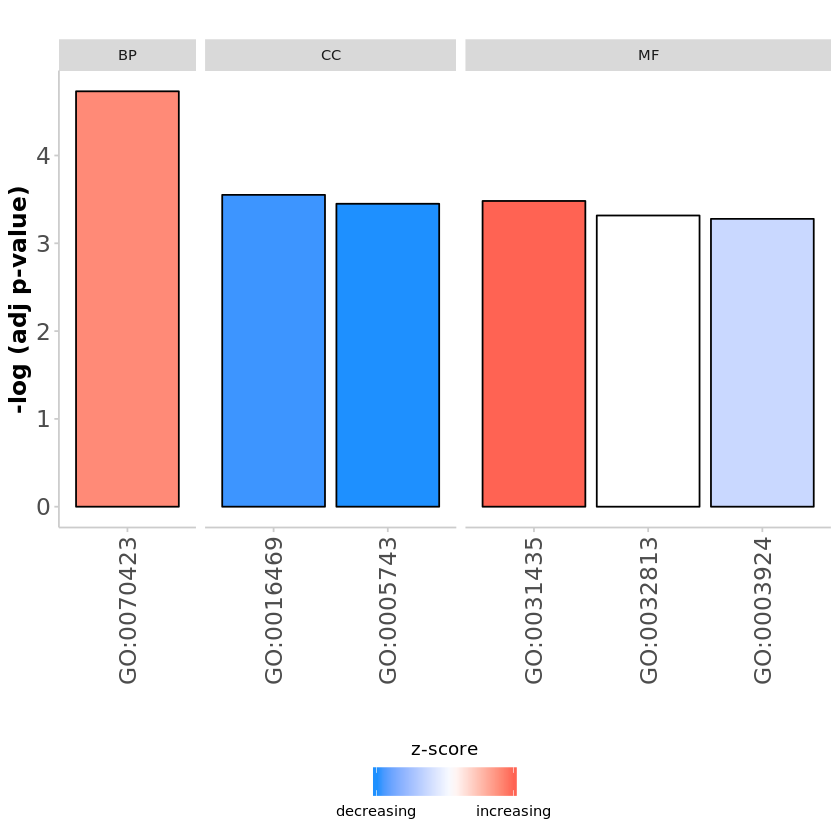

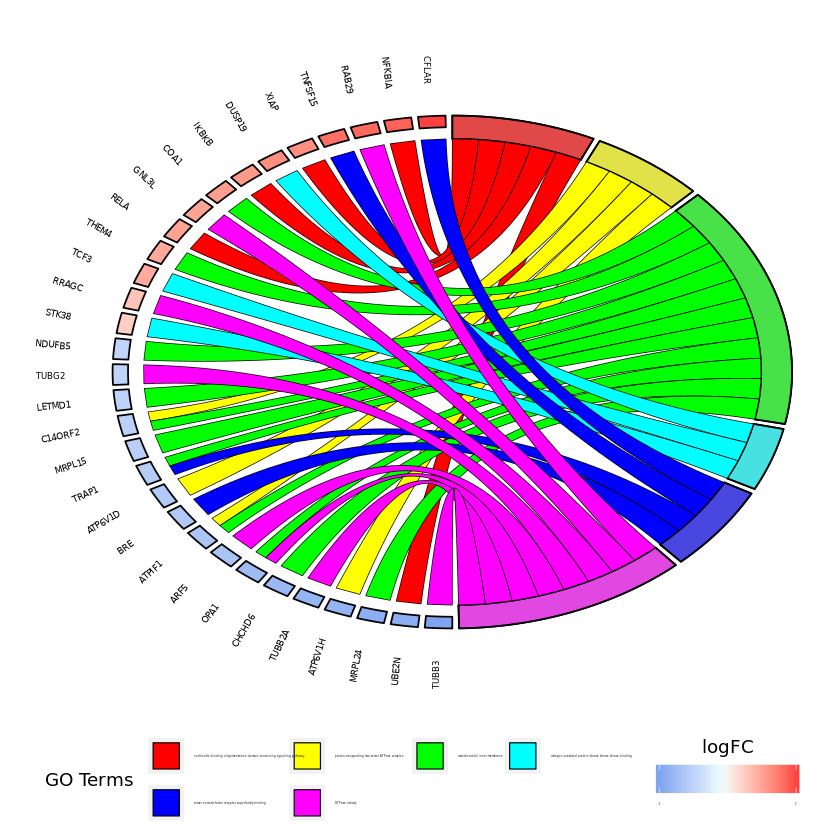

In [34]:
# prepare enrichment table to plot using the object result obtained in the last step
result.go=result[, c(1,2,3,9,12)]
result.go= result.go[result.go$category %in% categories.toplot ,]
names(result.go)=c("Category","ID","Term","adj_pval","Genes") 
result.go$Genes=gsub(';', ',', result.go$Genes)
#print(head(result.go,n=3))

# Generate the plotting object
circ <- circle_dat(result.go, genedf.list)
# Reduce redundant terms with a gene overlap >= 0.85...
reduced_circ <- reduce_overlap(circ, overlap = 0.85)
# dataframe with all genes in selected categories after reducing
reduced_circ_genes=circ[circ$term %in% reduced_circ$term ,]
filename="meta_case_control"
write.table(reduced_circ_genes,paste(outpath,paste(filename,"GOdataframe",sep="_"),sep="/"))

# bar plot
GOBar(reduced_circ_genes, display = 'multiple',title=paste("bar",filename)) 

# chord plot 
reduced_logfc=unique(reduced_circ_genes[, c(5,6)]) # extract genes and logFC from circ object
reduced_chord_genes <- chord_dat(reduced_circ_genes) # logFC column is missing
reduced_chord_genes.logfc=merge(reduced_chord_genes,reduced_logfc,by.x="row.names",by.y="genes")
reduced_chord_genes.logFC=reduced_chord_genes.logfc[ ,-c(1)]
rownames(reduced_chord_genes.logFC)= reduced_chord_genes.logfc[ ,1]

GOChord(reduced_chord_genes.logFC, space = 0.02, gene.order = 'logFC', gene.space = 0.30, gene.size = 1.8,process.label=1.5,border.size = 0.2,title=paste("chord",filename))
# to pdf
#pdf(file=paste(outpath,paste(filename,"goplot.pdf",sep="_"),sep="/"))
#GOBar(reduced_circ_genes, display = 'multiple',title=paste("bar",filename))
#GOChord(reduced_chord_genes.logFC, space = 0.02, gene.order = 'logFC', gene.space = 0.30, gene.size = 1.8,process.label=1.5,border.size = 0.2,title=paste("chord",filename))
#dev.off()


**Note:** the leyend in the GO chord plot has a very small font. It is not possible to find a suitable parameter to properly visualize the full leyend. Contact the package owner or try yourself to improved it if needed. Otherwsise, print the plot to pdf and zoom.